<a href="https://colab.research.google.com/github/Noob919/ResearchProject/blob/main/Y_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ydata-synthetic

In [18]:
import pandas as pd
from ydata_synthetic.synthesizers.regular import RegularSynthesizer
from ydata_synthetic.synthesizers import ModelParameters, TrainParameters
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D

In [19]:
cols_to_read = ['Total.Length.of.Bwd.Packets', 'Fwd.IAT.Min','Down.Up.Ratio']
data  = pd.read_csv("/content/drive/MyDrive/DataResearch/Dataset-Unicauca-Version2-87Atts.csv", usecols=cols_to_read)
data = data[0:800]
data.head()

,Total.Length.of.Bwd.Packets,Fwd.IAT.Min,Down.Up.Ratio
0,110414.0,698.0,2
1,0.0,1.0,0
2,0.0,0.0,0
3,0.0,0.0,3
4,0.0,0.0,0


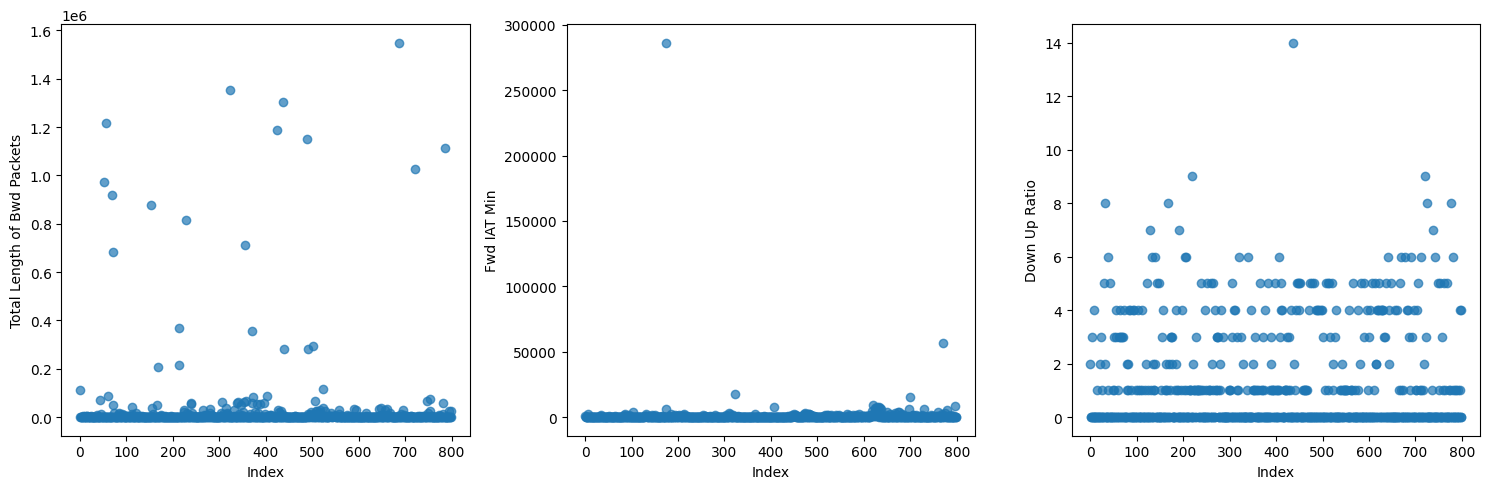

In [31]:
# Create three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Scatter plot for Total Length vs Fwd IAT Min
axes[0].scatter(data.index, data['Total.Length.of.Bwd.Packets'], alpha=0.7)

axes[0].set_xlabel('Index')
axes[0].set_ylabel('Total Length of Bwd Packets')

# Scatter plot for Total Length vs Down Up Ratio
axes[1].scatter(data.index, data['Fwd.IAT.Min'], alpha=0.7)

axes[1].set_xlabel('Index')
axes[1].set_ylabel('Fwd IAT Min')

# Scatter plot for Fwd IAT Min vs Down Up Ratio
axes[2].scatter(data.index, data['Down.Up.Ratio'], alpha=0.7)

axes[2].set_xlabel('Index')
axes[2].set_ylabel('Down Up Ratio')

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()


In [20]:
synth = RegularSynthesizer(modelname='fast')
synth.fit(data=data, num_cols=['Total.Length.of.Bwd.Packets', 'Fwd.IAT.Min'], cat_cols=['Down.Up.Ratio'])

Hyperparameter search: 100%|██████████| 8/8 [00:02<00:00,  3.05it/s]


In [21]:
synth_data = synth.sample(800)
synth_data

,Total.Length.of.Bwd.Packets,Fwd.IAT.Min,Down.Up.Ratio
0,5.601655e+03,-557.674042,0
1,8.226831e+03,5159.131058,0
2,-2.465540e+04,3303.578757,0
3,-1.881664e+03,-1811.812056,0
4,3.735400e+02,-1493.572298,0
...,...,...,...
795,3.202190e+04,1066.571726,8
796,2.388877e+02,57.809361,7
797,5.911994e+03,245.770509,9
798,-2.902250e+03,-48.666651,9


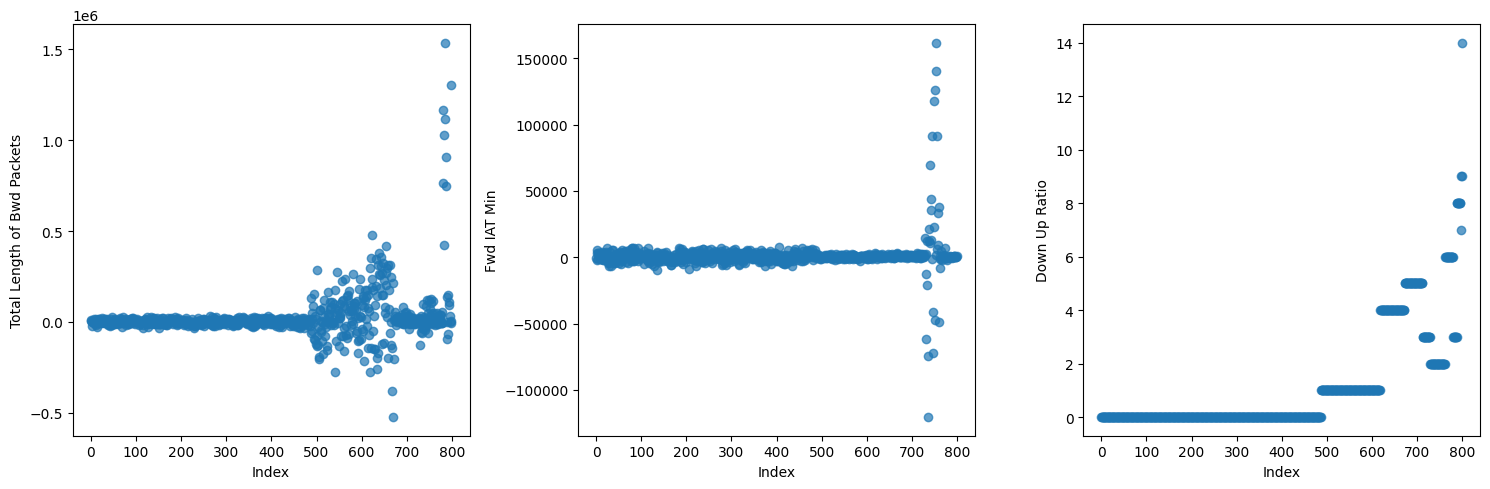

In [33]:
# Create three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Scatter plot for Total Length vs Fwd IAT Min
axes[0].scatter(synth_data.index, synth_data['Total.Length.of.Bwd.Packets'], alpha=0.7)

axes[0].set_xlabel('Index')
axes[0].set_ylabel('Total Length of Bwd Packets')

# Scatter plot for Total Length vs Down Up Ratio
axes[1].scatter(synth_data.index, synth_data['Fwd.IAT.Min'], alpha=0.7)

axes[1].set_xlabel('Index')
axes[1].set_ylabel('Fwd IAT Min')

# Scatter plot for Fwd IAT Min vs Down Up Ratio
axes[2].scatter(synth_data.index, synth_data['Down.Up.Ratio'], alpha=0.7)

axes[2].set_xlabel('Index')
axes[2].set_ylabel('Down Up Ratio')

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()